# Results from DFT Calculations
This jupyter notebook extracts the results from the DFT calculations given from VASP.

## Bulk Structure
The figure below illustrates a unit cell of a structure on the form AB$_2$ with a space group: Pnma 62, which illustrates an orthorombic structure containing 8 A(Ba $\&$ Sr)-atoms  (large green spheres) and 16 B (Si, Ge, C)-atoms (small blue spheres) that are contained in the unit cell.

<img src="../Figures/cell.png">

## Convergence
In this section we are going to check convergence of various calculated properties and we will focus on the material BaSi$_2$ for the convergence tests, and base our calculation on these values throughout this project. 


### Convergence test of the total energy per unit cell with respect to energy cutoff.
We start by looking at the convergence of the total energy as a function of the energy cutoff.This can be visualized by plotting the total energy as a function of the cutoff energy and this isillustrated in Figure 1 below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import re
sns.set()
sys.path.append('../../')
from Code.python_scripts.functions.data import readFilesFromDirectory, readEnergyFromFile, read_table, read_atoms


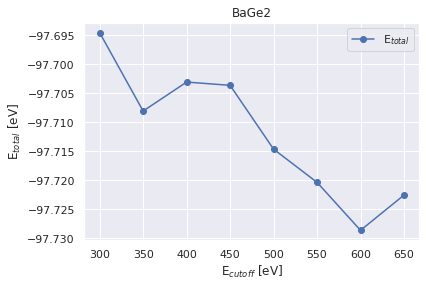

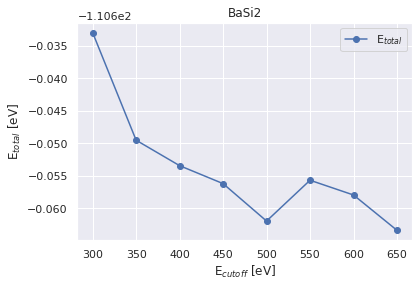

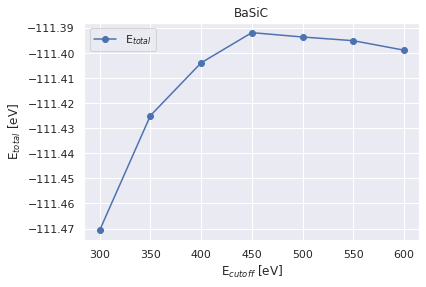

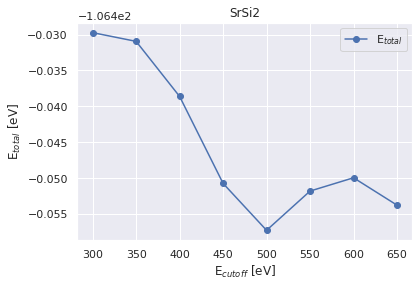

In [2]:
folders = ['BaGe2', 'BaSi2', 'BaSiC', 'SrSi2']
cutoff = np.arange(300, 700, 50)

for folder in folders:
    thisdir = '../Bulk/' + folder + '/convergence_Results'
    filepaths, filenames = readFilesFromDirectory(thisdir)
    data = readEnergyFromFile(filepaths, filenames)

    total_energy = data['ecut1.txt']

    plt.plot(cutoff, total_energy, '-o')
    plt.legend(["E$_{total}$"])
    plt.title(folder)
    plt.xlabel("E$_{cutoff}$ [eV]")
    plt.ylabel("E$_{total}$ [eV]")
    plt.show()

### Energy Difference


,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
E$_{cut}$,,
300,-97.694552,NaN
350,-97.708062,13.5101
400,-97.703066,4.99546
450,-97.703627,0.56032
500,-97.714620,10.993
550,-97.720339,5.71906
600,-97.728604,8.2657
650,-97.722533,6.07102


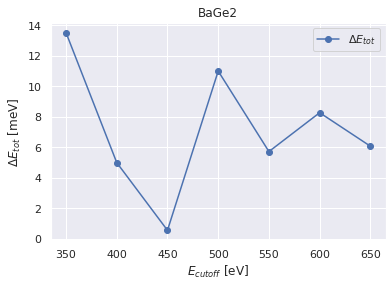

\begin{longtable}{lrl}
\toprule
{} &  \$E\_\{tot\}\$ [eV] & \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
E\$\_\{cut\}\$ &                 &                        \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
300       &         -97.695 &                    NaN \\
350       &         -97.708 &                13.5101 \\
400       &         -97.703 &                4.99546 \\
450       &         -97.704 &                0.56032 \\
500       &         -97.715 &                 10.993 \\
550       &         -97.720 &                5.71906 \\
600       &         -97.729 &                 8.2657 \\
650       &         -97.723 &                6.07102 \\
\end{longtable}



,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
E$_{cut}$,,
300,-110.632969,NaN
350,-110.649505,16.536
400,-110.653415,3.90985
450,-110.656176,2.7604
500,-110.661930,5.75466
550,-110.655656,6.27426
600,-110.657926,2.26977
650,-110.663354,5.42838


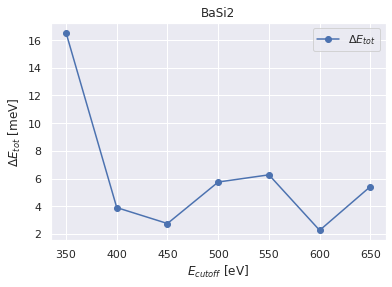

\begin{longtable}{lrl}
\toprule
{} &  \$E\_\{tot\}\$ [eV] & \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
E\$\_\{cut\}\$ &                 &                        \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
300       &        -110.633 &                    NaN \\
350       &        -110.650 &                 16.536 \\
400       &        -110.653 &                3.90985 \\
450       &        -110.656 &                 2.7604 \\
500       &        -110.662 &                5.75466 \\
550       &        -110.656 &                6.27426 \\
600       &        -110.658 &                2.26977 \\
650       &        -110.663 &                5.42838 \\
\end{longtable}



,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
E$_{cut}$,,
300,-111.470720,NaN
350,-111.424982,45.7378
400,-111.403897,21.0854
450,-111.391849,12.048
500,-111.393586,1.73754
550,-111.395059,1.47224
600,-111.398844,3.78534
650,NaN,NaN


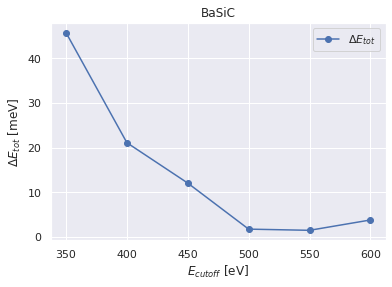

\begin{longtable}{lrl}
\toprule
{} &  \$E\_\{tot\}\$ [eV] & \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
E\$\_\{cut\}\$ &                 &                        \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
300       &        -111.471 &                    NaN \\
350       &        -111.425 &                45.7378 \\
400       &        -111.404 &                21.0854 \\
450       &        -111.392 &                 12.048 \\
500       &        -111.394 &                1.73754 \\
550       &        -111.395 &                1.47224 \\
600       &        -111.399 &                3.78534 \\
650       &             NaN &                    NaN \\
\end{longtable}



,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
E$_{cut}$,,
300,-106.429731,NaN
350,-106.430946,1.21441
400,-106.438620,7.67401
450,-106.450734,12.1146
500,-106.457271,6.53672
550,-106.451803,5.46818
600,-106.449951,1.85189
650,-106.453765,3.8137


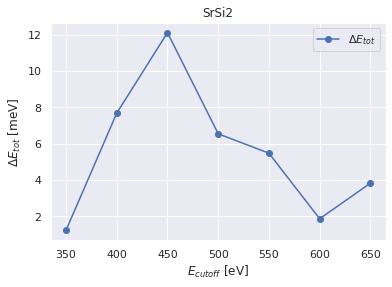

\begin{longtable}{lrl}
\toprule
{} &  \$E\_\{tot\}\$ [eV] & \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
E\$\_\{cut\}\$ &                 &                        \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
300       &        -106.430 &                    NaN \\
350       &        -106.431 &                1.21441 \\
400       &        -106.439 &                7.67401 \\
450       &        -106.451 &                12.1146 \\
500       &        -106.457 &                6.53672 \\
550       &        -106.452 &                5.46818 \\
600       &        -106.450 &                1.85189 \\
650       &        -106.454 &                 3.8137 \\
\end{longtable}



In [3]:
for folder in folders:
    
    thisdir = '../Bulk/' + folder + '/convergence_Results'
    filepaths, filenames = readFilesFromDirectory(thisdir)
    data = readEnergyFromFile(filepaths, filenames)
    
    
    energy = pd.DataFrame({"E$_{cut}$": cutoff, "$E_{tot}$ [eV]": data['ecut1.txt']})
    diff = []
    diff.append('NaN')
    for i in range(1, len(data['ecut1.txt'])):
        temp_value = abs(data['ecut1.txt'][i] - data['ecut1.txt'][i-1])*1000 
        diff.append((temp_value))
    
    energy['$\Delta E_{tot}$ [meV]'] = diff 
    energy.set_index('E$_{cut}$', inplace=True, drop=True)
    display(energy)
    
    plt.plot(cutoff[1:], energy['$\Delta E_{tot}$ [meV]'][1:], "-o")
    plt.legend(["$\Delta E_{tot}$"])
    plt.title(folder)
    plt.xlabel("$E_{cutoff}$ [eV]")
    plt.ylabel("$\Delta E_{tot}$ [meV]")
    plt.show()
    
    energy = energy.round(3)
    print(energy.to_latex(index = True, multirow = True, longtable = True)) 

### Convergence test of the total energy per unit cell with respect to k-point density.

,mesh,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
Nk,,,
2,(2x2x2),-97.659176,NaN
3,(3x3x2),-97.822786,163.61
4,(3x4x3),-97.801766,21.0204
5,(4x5x3),-97.801003,0.76249
6,(5x6x4),-97.801119,0.11574
7,(5x7x4),-97.801131,0.01215
8,(6x8x5),-97.801132,0.00046
9,(7x9x5),-97.801128,0.00373


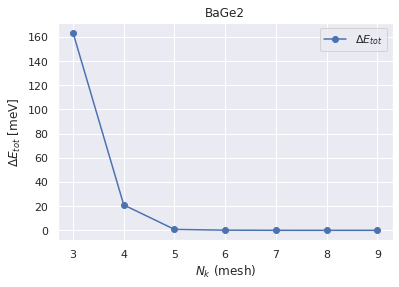

\begin{longtable}{llrl}
\toprule
{} &     mesh &  \$E\_\{tot\}\$ [eV] & \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
Nk &          &                 &                        \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
2  &  (2x2x2) &         -97.659 &                    NaN \\
3  &  (3x3x2) &         -97.823 &                 163.61 \\
4  &  (3x4x3) &         -97.802 &                21.0204 \\
5  &  (4x5x3) &         -97.801 &                0.76249 \\
6  &  (5x6x4) &         -97.801 &                0.11574 \\
7  &  (5x7x4) &         -97.801 &                0.01215 \\
8  &  (6x8x5) &         -97.801 &                0.00046 \\
9  &  (7x9x5) &         -97.801 &                0.00373 \\
\end{longtable}



,mesh,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
Nk,,,
2,(2x2x2),-110.702367,NaN
3,(3x3x2),-110.810483,108.117
4,(3x4x3),-110.807886,2.597
5,(4x5x3),-110.808417,0.5302
6,(5x6x4),-110.808362,0.05513
7,(5x7x4),-110.808366,0.00469
8,(6x8x5),-110.808363,0.00355
9,(7x9x5),NaN,NaN


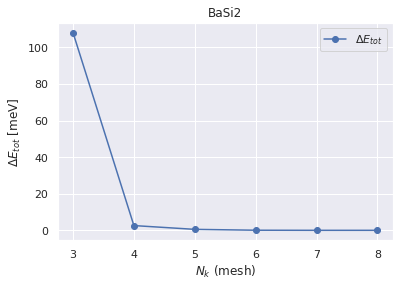

\begin{longtable}{llrl}
\toprule
{} &     mesh &  \$E\_\{tot\}\$ [eV] & \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
Nk &          &                 &                        \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
2  &  (2x2x2) &        -110.702 &                    NaN \\
3  &  (3x3x2) &        -110.810 &                108.117 \\
4  &  (3x4x3) &        -110.808 &                  2.597 \\
5  &  (4x5x3) &        -110.808 &                 0.5302 \\
6  &  (5x6x4) &        -110.808 &                0.05513 \\
7  &  (5x7x4) &        -110.808 &                0.00469 \\
8  &  (6x8x5) &        -110.808 &                0.00355 \\
9  &  (7x9x5) &             NaN &                    NaN \\
\end{longtable}



,mesh,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
Nk,,,
2,(2x2x2),-111.618335,NaN
3,(3x3x2),-111.843047,224.712
4,(3x4x3),-111.821190,21.8571
5,(4x5x3),-111.824068,2.87783
6,(5x6x4),-111.823723,0.34462
7,(5x7x4),-111.823765,0.04142
8,(6x8x5),-111.823779,0.01417
9,(7x9x5),-111.823770,0.0094


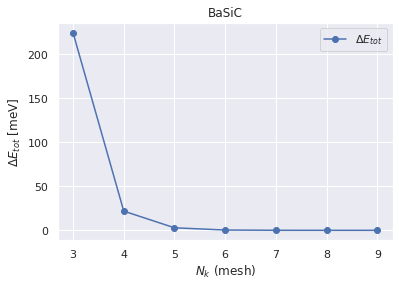

\begin{longtable}{llrl}
\toprule
{} &     mesh &  \$E\_\{tot\}\$ [eV] & \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
Nk &          &                 &                        \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
2  &  (2x2x2) &        -111.618 &                    NaN \\
3  &  (3x3x2) &        -111.843 &                224.712 \\
4  &  (3x4x3) &        -111.821 &                21.8571 \\
5  &  (4x5x3) &        -111.824 &                2.87783 \\
6  &  (5x6x4) &        -111.824 &                0.34462 \\
7  &  (5x7x4) &        -111.824 &                0.04142 \\
8  &  (6x8x5) &        -111.824 &                0.01417 \\
9  &  (7x9x5) &        -111.824 &                 0.0094 \\
\end{longtable}



,mesh,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
Nk,,,
2,(2x2x2),-106.659867,NaN
3,(3x3x2),-106.944075,284.208
4,(3x4x3),-106.910051,34.0238
5,(4x5x3),-106.916444,6.39294
6,(5x6x4),-106.915498,0.94637
7,(5x7x4),-106.915705,0.20702
8,(6x8x5),-106.915683,0.02226
9,(7x9x5),-106.915690,0.00735


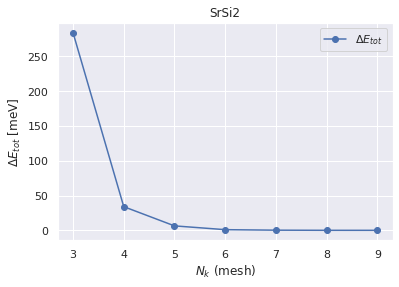

\begin{longtable}{llrl}
\toprule
{} &     mesh &  \$E\_\{tot\}\$ [eV] & \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
Nk &          &                 &                        \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
2  &  (2x2x2) &        -106.660 &                    NaN \\
3  &  (3x3x2) &        -106.944 &                284.208 \\
4  &  (3x4x3) &        -106.910 &                34.0238 \\
5  &  (4x5x3) &        -106.916 &                6.39294 \\
6  &  (5x6x4) &        -106.915 &                0.94637 \\
7  &  (5x7x4) &        -106.916 &                0.20702 \\
8  &  (6x8x5) &        -106.916 &                0.02226 \\
9  &  (7x9x5) &        -106.916 &                0.00735 \\
\end{longtable}



In [4]:
kpoints = np.arange(2,10)
mesh = ['(2x2x2)', '(3x3x2)', '(3x4x3)', '(4x5x3)', 
      '(5x6x4)', '(5x7x4)', '(6x8x5)', '(7x9x5)']

for folder in folders:
    
    thisdir = '../Bulk/' + folder + '/convergence_Results'
    filepaths, filenames = readFilesFromDirectory(thisdir)
    data = readEnergyFromFile(filepaths, filenames)
    
    
    energy = pd.DataFrame({"Nk": kpoints, "mesh": mesh, "$E_{tot}$ [eV]": data['ktest.txt']})
    energy.set_index('Nk', inplace=True, drop=True)
    
    diff = []
    diff.append('NaN')
    for i in range(1, len(data['ktest.txt'])):
        temp_value = (abs(data['ktest.txt'][i] - data['ktest.txt'][i-1])*1000)
        diff.append((temp_value))
    
    energy['$\Delta E_{tot}$ [meV]'] = diff
    display(energy)
    
    plt.plot(kpoints[1:], energy['$\Delta E_{tot}$ [meV]'][1:], "-o")
    plt.legend(["$\Delta E_{tot}$"])
    plt.title(folder)
    plt.xlabel("$N_k$ (mesh)")
    plt.ylabel("$\Delta E_{tot}$ [meV]")
    plt.show()
    
    energy = energy.round(3)
    print(energy.to_latex(index = True, multirow = True, longtable = True)) 
    

## Relaxation

In [5]:
from ase import io
from tabulate import tabulate 
#from ase.io.vasp import read_vasp

# Read crystal structure from POSCAR
folders = ['BaGe2', 'BaSi2', 'BaSiC', 'SrSi2']
functionals = ['DFT-D3', 'LDA', 'PBE', 'rev-vdW-DF2', 'vdW-opt88']
file = 'CONTCAR'
structure = {}

for folder in folders:
    tmp = {}
    tmp['Functional'] = []
    tmp['a'] = []
    tmp['b'] = []
    tmp['c'] = []
    for functional in functionals:
        thisdir = '../Bulk/' + folder + '/Relax/' + functional + '/'
        lattice = read_atoms(thisdir + file)
        tmp['Functional'].append(functional)
        tmp['a'].append(lattice[0])
        tmp['b'].append(lattice[1])
        tmp['c'].append(lattice[2])

    structure[folder] = pd.DataFrame(tmp)
    structure[folder] = structure[folder].style.set_caption(folder)
    # displaying the DataFrame 
    #print(tabulate(structure[folder], tablefmt = 'latex')) 
    display(structure[folder])
    

,Functional,a,b,c
0,DFT-D3,9.137189,6.828004,11.632496
1,LDA,8.907029,6.700357,11.378664
2,PBE,9.272917,6.882360,11.740163
3,rev-vdW-DF2,9.091647,6.832073,11.629878
4,vdW-opt88,9.170782,6.872860,11.697717


,Functional,a,b,c
0,DFT-D3,8.947759,6.709403,11.492224
1,LDA,8.759012,6.604187,11.284017
2,PBE,9.054805,6.764395,11.588125
3,rev-vdW-DF2,8.905835,6.725852,11.505485
4,vdW-opt88,8.968362,6.761316,11.577124


,Functional,a,b,c
0,DFT-D3,8.656906,6.132981,11.342847
1,LDA,8.608901,5.771292,11.361807
2,PBE,8.953261,6.085272,11.474697
3,rev-vdW-DF2,8.514750,6.129121,11.500070
4,vdW-opt88,8.533800,6.217044,11.473937


,Functional,a,b,c
0,DFT-D3,8.573761,6.413545,11.003438
1,LDA,8.417969,6.306624,10.809745
2,PBE,8.654407,6.470905,11.102183
3,rev-vdW-DF2,8.568593,6.421729,11.013126
4,vdW-opt88,8.573534,6.463686,11.046404


## Energy Calculations

### Extracting Energy calculation for single atoms

Assigning the energy values for the single atom 

In [15]:
thisdir = '../atom_Energy'
filepaths, filenames = readFilesFromDirectory(thisdir)
data = readEnergyFromFile(filepaths, filenames)
atom = read_table(filepaths, filenames)

energy_dic = {}

"""
barium = data['barium.txt']
silicon = data['silicon.txt']
carbon = data['carbon.txt']

basi2_atoms = 4*barium[0] + 8*silicon[0]
basi2_crystal = 2*barium[1] + silicon[2]
basi2_cluster = 8*barium[0] + 4*silicon[1]
"""

for key in atom.keys():
    atom[key] = atom[key].rename(columns={'E0':'Atom Energy [eV]'})
    title = re.findall(r'^([\w]+)', key)[0]
    energy_dic[key] = atom[key].copy()
    atom[key] = atom[key].style.set_caption(title)
    

    display(atom[key])

,Functional,Atom Energy [eV]
0,DFT-D3,-0.065906
1,LDA,-0.041244
2,PBE,-0.041244
3,rev-vdW-DF2,1.281009
4,vdW-DF-cx,1.135240
5,vdW-opt88,1.296931


,Functional,Atom Energy [eV]
0,DFT-D3,0.014107
1,LDA,0.021283
2,PBE,0.021283
3,rev-vdW-DF2,0.144176
4,vdW-DF-cx,-0.423158
5,vdW-opt88,-0.121097


,Functional,Atom Energy [eV]
0,DFT-D3,-0.013042
1,LDA,-0.011861
2,PBE,-0.011861
3,rev-vdW-DF2,0.425253
4,vdW-DF-cx,0.080067
5,vdW-opt88,0.261595


,Functional,Atom Energy [eV]
0,DFT-D3,-0.016457
1,LDA,-0.015458
2,PBE,-0.015458
3,rev-vdW-DF2,0.288885
4,vdW-DF-cx,-0.127312
5,vdW-opt88,0.072468


,Functional,Atom Energy [eV]
0,DFT-D3,-0.084433
1,LDA,-0.071189
2,PBE,-0.071189
3,rev-vdW-DF2,1.298651
4,vdW-DF-cx,1.173315
5,vdW-opt88,1.329995


### Extracting Energy calculation for solid structures
Assigning the energy values for the crystal calculation

In [16]:
thisdir = '../solid_Energy'
filepaths, filenames = readFilesFromDirectory(thisdir)
data = readEnergyFromFile(filepaths, filenames)
solid = read_table(filepaths, filenames)

solids_atom = {'barium.txt': 2, 'silicon.txt': 8, 'carbon.txt': 4, 
              'germanium.txt': 4, 'strontium.txt': 4}

for key in solid.keys():
    solid[key] = solid[key].rename(columns={'E0':'Solid Energy [eV]'})
    energy_dic[key]['Solid Energy/atom [eV]'] = (solid[key]['Solid Energy [eV]']/solids_atom[key]).copy()
    title = re.findall(r'^([\w]+)', key)[0]
    solid[key] = solid[key].style.set_caption(title)
    

    display(solid[key])

,Functional,Solid Energy [eV]
0,DFT-D3,-0.065906
1,LDA,-0.041244
2,PBE,-0.041244
3,rev-vdW-DF2,1.281009
4,vdW-DF-cx,1.135240
5,vdW-opt88,1.296931


,Functional,Solid Energy [eV]
0,DFT-D3,0.014107
1,LDA,0.021283
2,PBE,0.021283
3,rev-vdW-DF2,0.144176
4,vdW-DF-cx,-0.423158
5,vdW-opt88,-0.121097


,Functional,Solid Energy [eV]
0,DFT-D3,-0.013042
1,LDA,-0.011861
2,PBE,-0.011861
3,rev-vdW-DF2,0.425253
4,vdW-DF-cx,0.080067
5,vdW-opt88,0.261595


,Functional,Solid Energy [eV]
0,DFT-D3,-0.016457
1,LDA,-0.015458
2,PBE,-0.015458
3,rev-vdW-DF2,0.288885
4,vdW-DF-cx,-0.127312
5,vdW-opt88,0.072468


,Functional,Solid Energy [eV]
0,DFT-D3,-0.084433
1,LDA,-0.071189
2,PBE,-0.071189
3,rev-vdW-DF2,1.298651
4,vdW-DF-cx,1.173315
5,vdW-opt88,1.329995


In [17]:
for key in energy_dic.keys():
    #title = re.findall(r'^([\w]+)', key)[0]
    #energy_dic[key] = energy_dic[key].style.set_caption(title)
    
    display(energy_dic[key])

,Functional,Atom Energy [eV],Solid Energy/atom [eV]
0,DFT-D3,-0.065906,-0.032953
1,LDA,-0.041244,-0.020622
2,PBE,-0.041244,-0.020622
3,rev-vdW-DF2,1.281009,0.640504
4,vdW-DF-cx,1.135240,0.567620
5,vdW-opt88,1.296931,0.648466


,Functional,Atom Energy [eV],Solid Energy/atom [eV]
0,DFT-D3,0.014107,0.003527
1,LDA,0.021283,0.005321
2,PBE,0.021283,0.005321
3,rev-vdW-DF2,0.144176,0.036044
4,vdW-DF-cx,-0.423158,-0.105789
5,vdW-opt88,-0.121097,-0.030274


,Functional,Atom Energy [eV],Solid Energy/atom [eV]
0,DFT-D3,-0.013042,-0.003261
1,LDA,-0.011861,-0.002965
2,PBE,-0.011861,-0.002965
3,rev-vdW-DF2,0.425253,0.106313
4,vdW-DF-cx,0.080067,0.020017
5,vdW-opt88,0.261595,0.065399


,Functional,Atom Energy [eV],Solid Energy/atom [eV]
0,DFT-D3,-0.016457,-0.002057
1,LDA,-0.015458,-0.001932
2,PBE,-0.015458,-0.001932
3,rev-vdW-DF2,0.288885,0.036111
4,vdW-DF-cx,-0.127312,-0.015914
5,vdW-opt88,0.072468,0.009059


,Functional,Atom Energy [eV],Solid Energy/atom [eV]
0,DFT-D3,-0.084433,-0.021108
1,LDA,-0.071189,-0.017797
2,PBE,-0.071189,-0.017797
3,rev-vdW-DF2,1.298651,0.324663
4,vdW-DF-cx,1.173315,0.293329
5,vdW-opt88,1.329995,0.332499


### Extracting Energy data for bulk structures

In [29]:
energies = {}
for folder in folders:
    thisdir = '../Bulk/' + folder + '/Etot/'
    filepaths, filenames = readFilesFromDirectory(thisdir)
    tmp_dic = read_table(filepaths, [folder])
    #tmp_dic[folder]['$E_{total}$ [eV]'] = tmp_dic[folder]['E0']
    tmp_dic[folder]['E0'] = tmp_dic[folder]['E0']/24
    tmp_dic[folder] = tmp_dic[folder].rename(columns={"E0": "$E_{tot}$ [ev/atom]"})
    energies[folder] = tmp_dic[folder].copy()
    tmp_dic[folder] = tmp_dic[folder].style.set_caption(folder)
    display(tmp_dic[folder])

,Functional,$E_{tot}$ [ev/atom]
0,DFT-D3,-4.340727
1,LDA,-4.751636
2,PBE,-4.170623
3,rev-vdW-DF2,-3.566513
4,vdW-opt88,-3.657560


,Functional,$E_{tot}$ [ev/atom]
0,DFT-D3,-4.773656
1,LDA,-5.104749
2,PBE,-4.617331
3,rev-vdW-DF2,-4.060447
4,vdW-opt88,-4.172889


,Functional,$E_{tot}$ [ev/atom]
0,DFT-D3,-5.473033
1,LDA,-5.931542
2,PBE,-5.348677
3,rev-vdW-DF2,-4.833246
4,vdW-opt88,-4.986441


,Functional,$E_{tot}$ [ev/atom]
0,DFT-D3,-4.683364
1,LDA,-4.975903
2,PBE,-4.506052
3,rev-vdW-DF2,-3.908902
4,vdW-opt88,-4.011170


## Formation Energy
We also calculate formation energy ($\Delta H_f$) of these compounds with respect to their elemental standard to model the thermodynamic function; this is important information for synthesis of the material. Enthalpy of formation ($\Delta H_f$) is calculated by using following equation:

$\Delta H_f$(BaSi$_2$) = E$_{tot}$(BaSi$_2$) - $\mu_{Ba}$ - 2$\mu_{Si}$

Here, $\Delta H_f$(BaSi$_2$) is the enthalpy of formation of compound BaSi$_2$. E$_{tot}$ (BaSi$_2$) is the total energy of the compound BaSi$_2$. $\mu_{Ba}$ and $\mu_{Si}$ represent the chemical potential of respective element (Ba and Si), i.e., a ground state total energy of each elemental solid per atom.

Mention that this formation energy is more like decomposition energy,  rather than considering full analyses of the chemical potentials of the elements. 


- dH = $E_{\text{coh}}$ if using $\mu$ = energy of sole atoms; 			(meV/atom)

- dH = dHd = decomposition energy if using $\mu$ = energy of solid   	(meV/atom)

In [37]:
dic ={
    'BaGe2': ['barium.txt', 'germanium.txt'], 
    'BaSi2': ['barium.txt', 'silicon.txt'],
    'BaSiC': ['barium.txt', 'silicon.txt', 'carbon.txt'],
    'SrSi2': ['strontium.txt', 'silicon.txt']
}

col1 = 'Atom Energy [eV]'
col2 = 'Solid Energy/atom [eV]'
for folder in folders:
    if folder != 'BaSiC':
        tmp1 = energy_dic[dic[folder][0]][col1] + 2*energy_dic[dic[folder][1]][col1]
        tmp2 = energy_dic[dic[folder][0]][col2] + 2*energy_dic[dic[folder][1]][col2]
    else:
        tmp1 = energy_dic[dic[folder][0]][col1] + energy_dic[dic[folder][1]][col1] + energy_dic[dic[folder][2]][col1]
        tmp2 = energy_dic[dic[folder][0]][col2] + energy_dic[dic[folder][1]][col2] + energy_dic[dic[folder][2]][col2]
        
    energies[folder]['$E_{coh}$ [eV]'] = energies[folder]['$E_{tot}$ [ev/atom]'] - tmp1
    energies[folder]['$dH_d$ [eV]'] = energies[folder]['$E_{tot}$ [ev/atom]'] - tmp2
    
    print(folder)
    display(energies[folder])

BaGe2


,Functional,$E_{tot}$ [ev/atom],$E_{coh}$ [eV],$dH_d$ [eV]
0,DFT-D3,-4.340727,-4.248737,-4.301253
1,LDA,-4.751636,-4.686671,-4.725084
2,PBE,-4.170623,-4.105658,-4.144071
3,rev-vdW-DF2,-3.566513,-5.698028,-4.419644
4,vdW-opt88,-3.657560,-4.952933,-4.265213


BaSi2


,Functional,$E_{tot}$ [ev/atom],$E_{coh}$ [eV],$dH_d$ [eV]
0,DFT-D3,-4.773656,-4.674836,-4.736588
1,LDA,-5.104749,-5.032589,-5.080263
2,PBE,-4.617331,-4.545171,-4.592845
3,rev-vdW-DF2,-4.060447,-5.919225,-4.773173
4,vdW-opt88,-4.172889,-5.053506,-4.708681


BaSiC


,Functional,$E_{tot}$ [ev/atom],$E_{coh}$ [eV],$dH_d$ [eV]
0,DFT-D3,-5.473033,-5.404777,-5.441550
1,LDA,-5.931542,-5.896123,-5.914309
2,PBE,-5.348677,-5.313258,-5.331444
3,rev-vdW-DF2,-4.833246,-6.547315,-5.545905
4,vdW-opt88,-4.986441,-5.571211,-5.432357


SrSi2


,Functional,$E_{tot}$ [ev/atom],$E_{coh}$ [eV],$dH_d$ [eV]
0,DFT-D3,-4.683364,-4.566017,-4.658141
1,LDA,-4.975903,-4.873798,-4.954241
2,PBE,-4.506052,-4.403947,-4.484390
3,rev-vdW-DF2,-3.908902,-5.785323,-4.305786
4,vdW-opt88,-4.011170,-4.929862,-4.272671


### Interlayer Energy calculations
Extracting the data from the text files and visualize the data in plots

#### Graphite

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


dft = '../Layers/L_L_distance/Graphite/DFT-D3.txt'
rev = '../Layers/L_L_distance/Graphite/rev-vdW-DF2.txt'
pbe = '../Layers/L_L_distance/Graphite/PBE.txt'
lda = '../Layers/L_L_distance/Graphite/LDA.txt'
vdw = '../Layers/L_L_distance/Graphite/vdW-opt88.txt'

rev = pd.read_table(rev, delim_whitespace=True)
pbe = pd.read_table(pbe, delim_whitespace=True)
dft = pd.read_table(dft, delim_whitespace=True)
vdw = pd.read_table(vdw, delim_whitespace=True)
lda = pd.read_table(lda, delim_whitespace=True)

# The starting distance between layers
origo = 3.348000050 # Between atom 1 and 2
x = np.linspace(-2.0, 2, len(rev['energy']))
x += origo
n = 4 # Number of atoms
plt.plot(x, (pbe['energy']-4*carbon)/n)
plt.plot(x, (lda['energy']-4*carbon)/n)
plt.plot(x, (dft['energy']-4*carbon)/n)
plt.plot(x, (rev['energy']-4*carbon)/n)
plt.plot(x, (vdw['energy']-4*carbon)/n)
plt.legend(['PBE', 'LDA', 'DFT-D3', 'rev-vdW-DF2', 'vdW-opt88'])
plt.title('Graphite')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')

#### BaSi2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


dft = '../Layers/L_L_distance/BaSi2/Bulk/DFT-D3.txt'
rev = '../Layers/L_L_distance/BaSi2/Bulk/rev-vdW-DF2.txt'
pbe = '../Layers/L_L_distance/BaSi2/Bulk/PBE.txt'
lda = '../Layers/L_L_distance/BaSi2/Bulk/LDA.txt'
vdw = '../Layers/L_L_distance/BaSi2/Bulk/vdW-opt88.txt'

rev = pd.read_table(rev, delim_whitespace=True)
pbe = pd.read_table(pbe, delim_whitespace=True)
dft = pd.read_table(dft, delim_whitespace=True)
vdw = pd.read_table(vdw, delim_whitespace=True)
lda = pd.read_table(lda, delim_whitespace=True)


# The starting distance between layers
#origo = 3.348000050 # Between atom 1 and 2
x = np.linspace(-2.0, 2, len(rev['energy']))
#x += origo
n = 24 # Number of atoms
plt.plot(x, (pbe['energy']-basi2_atoms)/n)
plt.plot(x, (dft['energy']-basi2_atoms)/n)
plt.plot(x, (rev['energy']-basi2_atoms)/n)
plt.plot(x, (vdw['energy']-basi2_atoms)/n)
plt.legend(['PBE', 'DFT-D3', 'rev-vdW-DF2', 'vdW-opt88'])
plt.title('BaSi2')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')


In [ ]:
plt.plot(x, (lda['energy']-basi2_atoms)/n)
plt.title('BaSi2')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')
plt.legend(['LDA'])

# Density of States

## Total DOS

In [ ]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import DosPlotter, BSPlotter, BSDOSPlotter

folders = ['Bulk']

for folder in folders:
    
    
    thisdir = '../Layers/dos/' + folder + '/'


    v = Vasprun(thisdir+'vasprun.xml')
    tdos = v.tdos
    plotter = DosPlotter()
    plotter.add_dos(folder + " : Total DOS", tdos)
    plotter.show()

## Elemental DOS

In [ ]:
folders = ['Bulk']
for folder in folders:
    
    
    thisdir = '../Layers/dos/' + folder + '/'


    v = Vasprun(thisdir+'vasprun.xml')
    cdos = v.complete_dos
    element_dos = cdos.get_element_dos()
    plotter = DosPlotter()
    plotter.add_dos_dict(element_dos)
    plotter.show()

### Si spd DOS 

In [ ]:
folders = ['Bulk']
for folder in folders:
    
    
    thisdir = '../Layers/dos/' + folder + '/'
    cdos = v.complete_dos
    element_spd_dos = cdos.get_element_spd_dos('Si')
    plotter = DosPlotter()
    plotter.add_dos_dict(element_spd_dos)
    plotter.show()

### Ba spd DOS

In [ ]:
folders = ['Bulk']
for folder in folders:
    
    
    thisdir = '../Layers/dos/' + folder + '/'
    cdos = v.complete_dos
    element_spd_dos = cdos.get_element_spd_dos('Ba')
    plotter = DosPlotter()
    plotter.add_dos_dict(element_spd_dos)
    plotter.show()

# Band Structure

## PBE + vdW

In [ ]:
folders = ['Bulk']
for folder in folders:

    thisdir = '../Layers/band_structure/rev-vdW-DF2/' + folder + '/'

    v = Vasprun(thisdir + 'vasprun.xml')
    gap = v.eigenvalue_band_properties

    v = BSVasprun(thisdir + 'vasprun.xml')
    bs = v.get_band_structure(kpoints_filename=thisdir+'KPOINTS', line_mode=True)
    plt = BSPlotter(bs)
    plt.get_plot(vbm_cbm_marker=True)

## HSE

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from vasprun import vasprun
folders = ['Bulk']

for folder in folders:

    thisdir = '../Layers/band_structure/HSE/' + folder + '/'

    vasp = vasprun(thisdir+'vasprun.xml')
    
    
    fig = plt.figure()
    vasp.plotbands(bravais="orthorhombic", kpoints=['Gamma', 'Y', 'T', 'Z', 'Gamma'], title=folder)
    
    